When we do FFT to the signal to find the frequency content, the noise have an effect of getting the correct frequency. Let's do a test this week to see what are the effects if we add in different level of noise to a signal.  

In [1]:
import numpy as np
from scipy import fft, arange
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline
plt.style.use('seaborn-poster')

In [2]:
def plotSpectrum(t, y,Fs, title = None):
    """
    Function to plot the time domain and frequency domain signal
    """
    n = len(y) # length of the signal
    k = arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(n/2)] # one side frequency range

    Y = fft(y)/n # fft computing and normalization
    Y = Y[range(n/2)]    
    
    # plot time domain and frequency domain signal
    plt.subplot(2,1,1)
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    if title:
        plt.title(title)
    plt.subplot(2,1,2)
    plt.stem(frq,abs(Y),'r')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.tight_layout()
    plt.show()

Let's first generate a signal with two frequencies in the signal, 5 Hz and 8 Hz. 

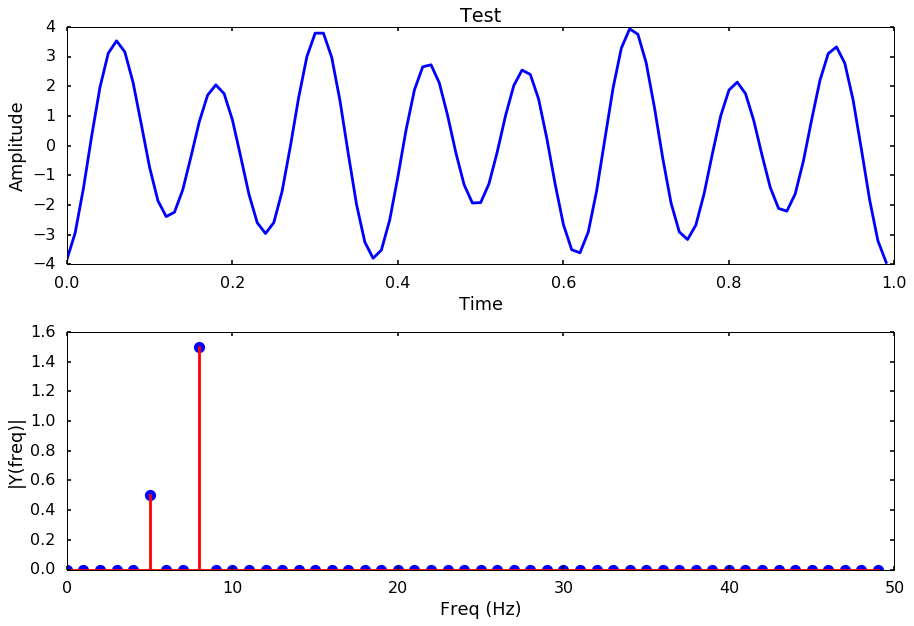

In [3]:
Fs = 100.0  # sampling rate
Ts = 1.0/Fs # sampling interval
t = arange(0,1,Ts) # time vector
ff_1 = 5   # frequency of the signal
ff_2 = 8
# create the signal
y = np.sin(2*np.pi*ff_1*t + 5) + 3 * np.sin(2*np.pi*ff_2*t + 5)

plotSpectrum(t, y,Fs, title = 'Test')

## Let's try different noise levels

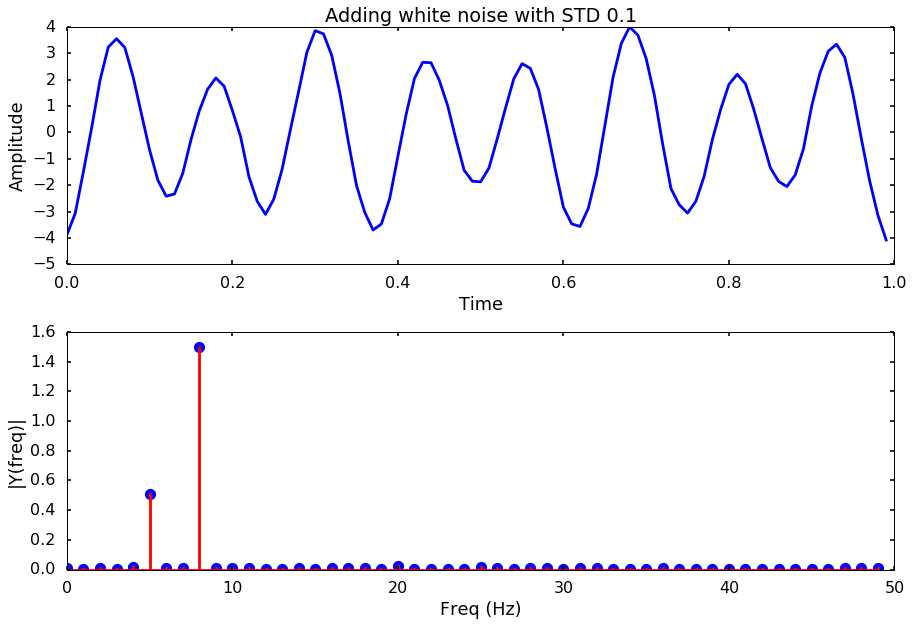

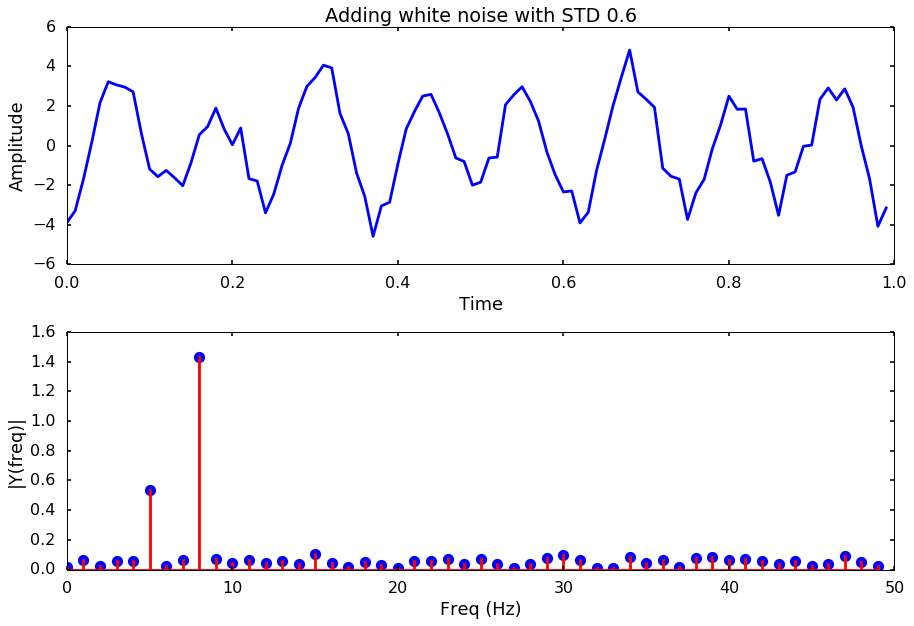

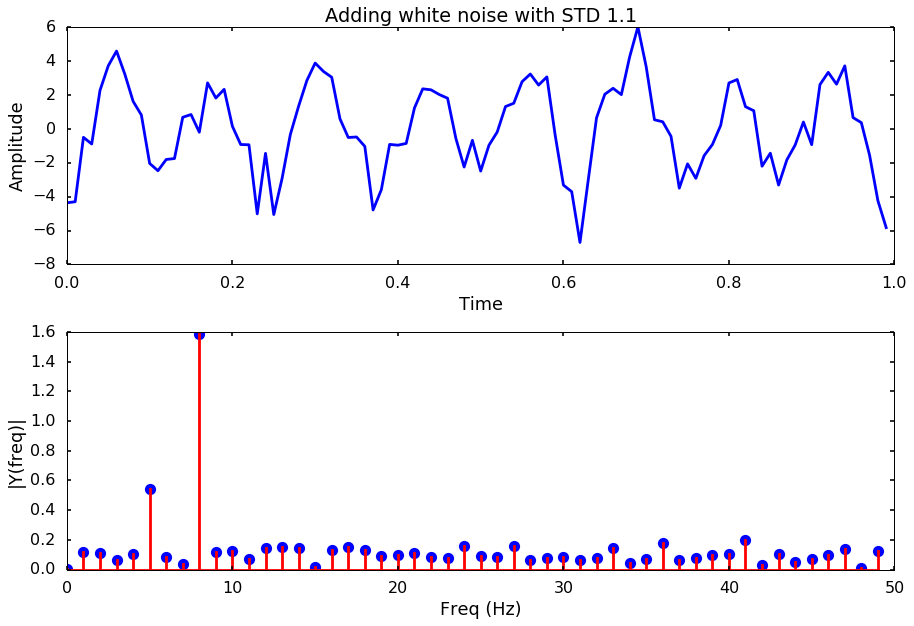

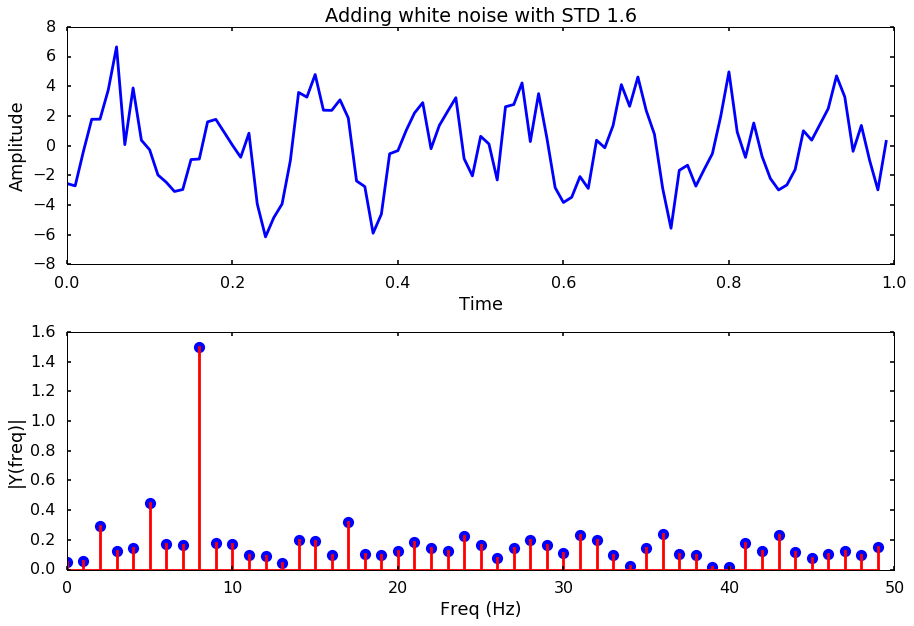

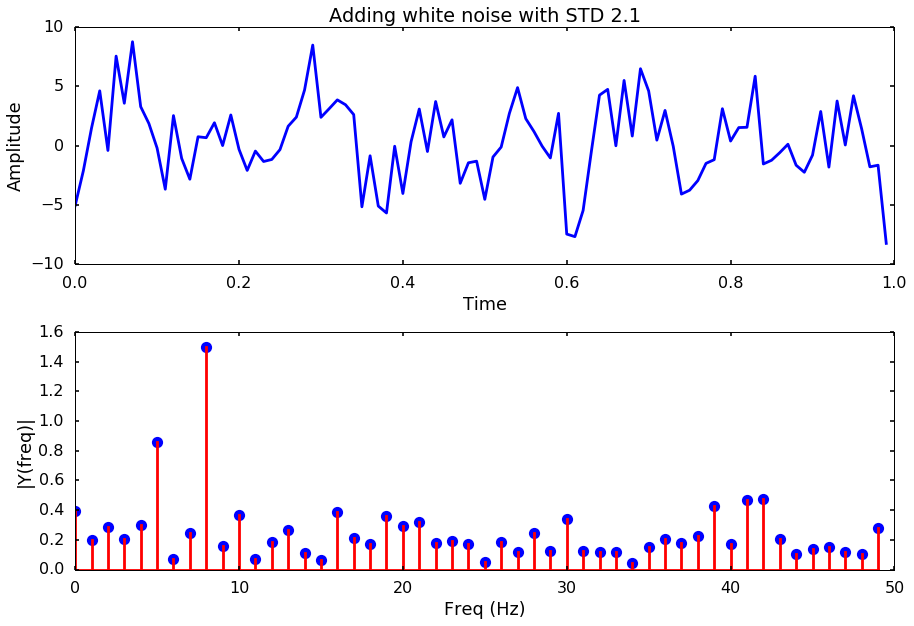

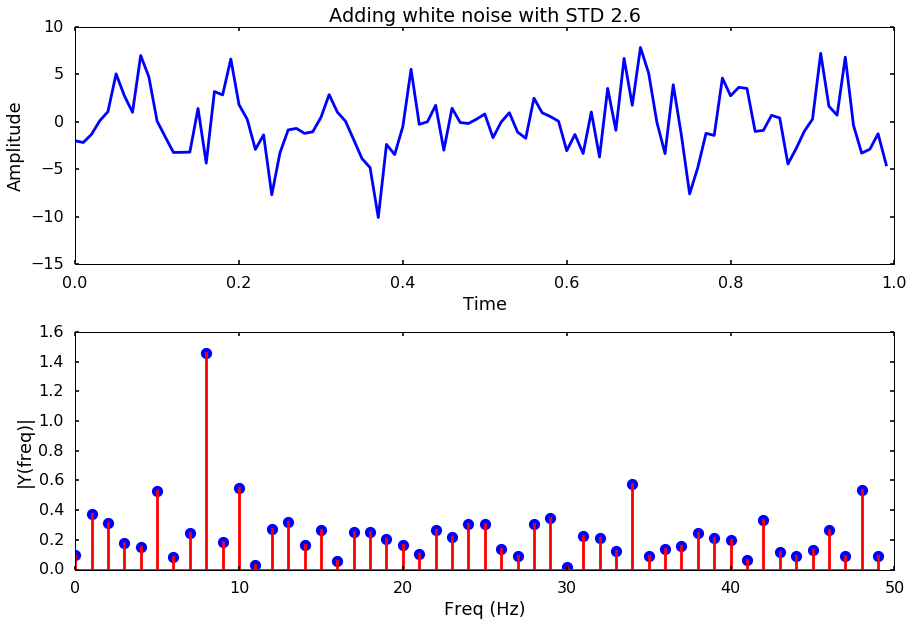

In [4]:
for i, std_noise in enumerate(np.arange(0.1, 3, 0.5)):
    title = 'Adding white noise with STD %.1f'%std_noise
    noise = np.array([np.random.normal(scale=std_noise) for i in range(len(y))])
    y_noise = y + noise
    plotSpectrum(t, y_noise,Fs, title = title)

Next week, we will try to use different method to estimate the spectrum other than the simple FFT, and see if some method is better to get the frequency out even with a high-level of noise. 